In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 62s 0us/step


In [4]:
data_dir

'.\\datasets\\flower_photos'

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [13]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

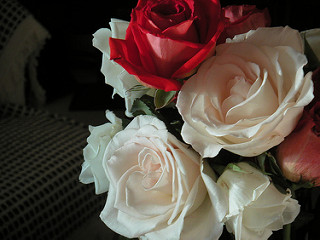

In [15]:
PIL.Image.open(str(roses[1]))

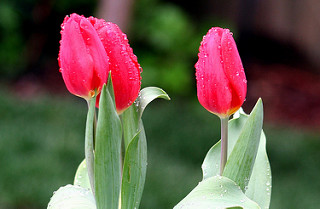

In [17]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [18]:
flowers_images_dict = {
     'roses' : list(data_dir.glob('roses/*')),
     'daisy' : list(data_dir.glob('daisy/*')),
     'dandelion' : list(data_dir.glob('dandelion/*')),
     'sunflowers' : list(data_dir.glob('sunflowers/*')),
     'tulips' : list(data_dir.glob('tulips/*'))
} 

In [29]:
flowers_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [25]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [30]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [31]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [41]:
x,y = [],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [45]:
x = np.array(x)
y = np.array(y)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [47]:
len(x_train)

2752

In [49]:
len(x_test)

918

In [50]:
x_train_scaled = x_train /255
x_test_scaled = x_test /255

In [51]:
x_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [54]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs = 10  )

Epoch 1/10
86/86 [==============================] - 108s 1s/step - loss: 1.3836 - accuracy: 0.4095
Epoch 2/10
86/86 [==============================] - 103s 1s/step - loss: 0.9846 - accuracy: 0.6185
Epoch 3/10
86/86 [==============================] - 81s 940ms/step - loss: 0.8116 - accuracy: 0.6995
Epoch 4/10
86/86 [==============================] - 81s 947ms/step - loss: 0.6246 - accuracy: 0.7682
Epoch 5/10
86/86 [==============================] - 83s 969ms/step - loss: 0.4193 - accuracy: 0.8470
Epoch 6/10
86/86 [==============================] - 101s 1s/step - loss: 0.2402 - accuracy: 0.9230
Epoch 7/10
86/86 [==============================] - 102s 1s/step - loss: 0.1613 - accuracy: 0.9506
Epoch 8/10
86/86 [==============================] - 99s 1s/step - loss: 0.1045 - accuracy: 0.9706
Epoch 9/10
86/86 [==============================] - 81s 941ms/step - loss: 0.0598 - accuracy: 0.9873
Epoch 10/10
86/86 [==============================] - 84s 973ms/step - loss: 0.0403 - accuracy: 0.9906


In [56]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 7s 235ms/step - loss: 2.1855 - accuracy: 0.6362


[2.1854641437530518, 0.6361655592918396]

In [58]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 6s 216ms/step


array([[ 11.317188  ,  13.470277  ,   8.697622  , -26.95048   ,
         -9.733942  ],
       [  7.4169426 ,  -6.8805146 , -10.147004  ,  -6.8461723 ,
          3.7221968 ],
       [  2.7889142 ,   3.6110907 ,  14.349562  , -16.015625  ,
         -3.6151693 ],
       ...,
       [ -0.20996234,  -4.18227   ,  -9.55944   ,   0.9952033 ,
          1.9394333 ],
       [  6.4266634 ,  -4.4289165 ,  -3.3795457 ,  -7.724563  ,
         -1.6315718 ],
       [ -0.5735    ,  -9.359094  ,   1.1068764 ,   5.1750665 ,
          0.59236693]], dtype=float32)

In [59]:
score = tf.nn.softmax(predictions[0])

In [60]:
np.argmax(score)

1

In [61]:
y_test[0]

1

# Let's Improve Test Accuracy Using Data Augmentation

In [63]:
img_height, img_width = 180, 180 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

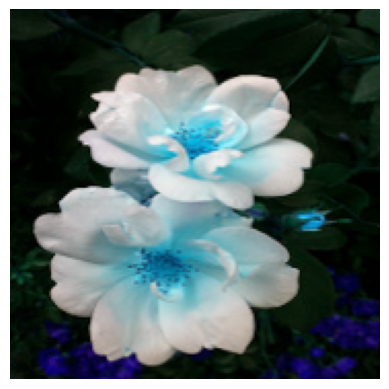

In [65]:
plt.axis('off')
plt.imshow(x[0])

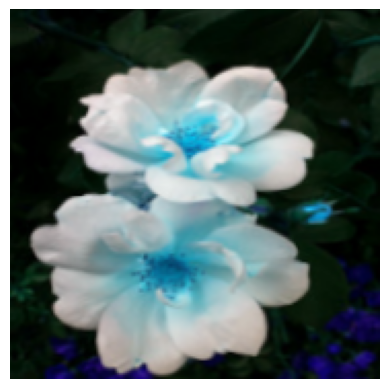

In [68]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [71]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 107s 1s/step - loss: 1.3561 - accuracy: 0.4390
Epoch 2/10
86/86 [==============================] - 125s 1s/step - loss: 1.0786 - accuracy: 0.5661
Epoch 3/10
86/86 [==============================] - 114s 1s/step - loss: 0.9818 - accuracy: 0.6210
Epoch 4/10
86/86 [==============================] - 95s 1s/step - loss: 0.8977 - accuracy: 0.6512
Epoch 5/10
86/86 [==============================] - 90s 1s/step - loss: 0.8584 - accuracy: 0.6646
Epoch 6/10
86/86 [==============================] - 90s 1s/step - loss: 0.8242 - accuracy: 0.6791
Epoch 7/10
86/86 [==============================] - 92s 1s/step - loss: 0.7860 - accuracy: 0.6944
Epoch 8/10
86/86 [==============================] - 91s 1s/step - loss: 0.7747 - accuracy: 0.7089
Epoch 9/10
86/86 [==============================] - 101s 1s/step - loss: 0.7252 - accuracy: 0.7242
Epoch 10/10
86/86 [==============================] - 107s 1s/step - loss: 0.6829 - accuracy: 0.7453


In [72]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 8s 258ms/step - loss: 0.8197 - accuracy: 0.6852


[0.8197301626205444, 0.6851851940155029]

# We can increase it more by doing run more epochs